In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.stats import linregress
import matplotlib.font_manager as font_manager
import matplotlib

In [48]:
#up2024_0430_10:31
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [53]:
#up2024_0430_10:12

loc_1 = 'E:/zyf_gn/zyf_gn_2301_data/ppb_2401_k1/'
data_1 = pd.read_csv(loc_1 + 'wea_export_yearly.csv')
data_1_year = data_1['wea_years'].values
data_1_atm = data_1['sun_times_b_atmean'].values

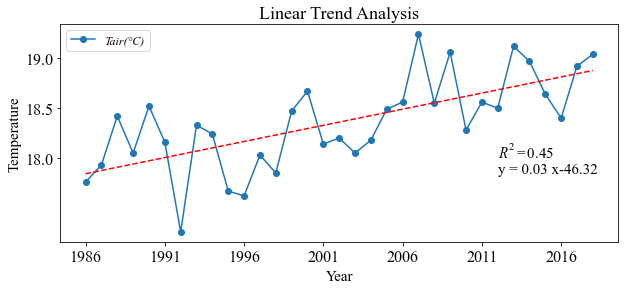

Slope: 0.03
Intercept: -46.32
R-squared: 0.455
P-value: 1.688e-05
Standard Error of the Slope: 0.01


In [66]:
#up2024_0430_10:31
#linear regression
stats_1 = linregress(data_1_year, data_1_atm)
trend_line = stats_1.slope * data_1_year + stats_1.intercept

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data_1_year, data_1_atm, label = 'Tair(°C)', marker = 'o')
ax.plot(data_1_year, trend_line, color = 'red', linestyle = '--')

font_props = {'family': 'serif','weight': 'normal','size': 12, 'style': 'italic'}
ax.legend(loc = 'upper left',  prop = font_props)

ax.set_title('Linear Trend Analysis', fontsize = 18, fontname = 'Times New Roman')
ax.set_xlabel('Year', fontsize = 15, fontname = 'Times New Roman')
ax.set_ylabel('Temperature', fontsize = 15, fontname = 'Times New Roman')

x_tick_set = np.arange(1986, 2019, 5) #to_be_set
y_tick_set = np.arange(18, 19.5, 0.5) #to_be_set
ax.set_xticks(x_tick_set)
ax.set_xticklabels(x_tick_set, fontsize = 16, fontname='Times New Roman')
ax.set_yticks(y_tick_set)
ax.set_yticklabels(y_tick_set, fontsize = 16, fontname='Times New Roman')

font_props2 = font_manager.FontProperties(size = 15)
ax.text(2012, 18, r'$R^2 = %.2f$'%(stats_1.rvalue**2), fontproperties = font_props2)
ax.text(2012, 17.85, 'y = %.2f x%.2f'%(stats_1.slope, stats_1.intercept), fontproperties = font_props2)


plt.savefig(loc_1 + 'yearly_data.jpg', dpi=300)
plt.show()

print(f"Slope: {stats_1.slope:.2f}")
print(f"Intercept: {stats_1.intercept:.2f}")
print(f"R-squared: {stats_1.rvalue**2:.3f}")
print(f"P-value: {stats_1.pvalue:.3e}")
print(f"Standard Error of the Slope: {stats_1.stderr:.2f}")